Breath Detection Algorithm | RightAir | Fall 2019

Decision Algorithm Implemented on Training Data

## Import all Libraries

In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py

/Users/mikefurr/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/mikefurr/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/mikefurr/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/mikefurr/anaconda3/lib/python3.7/site-packages/tensorflow/python/f

## Gather Training and Testing Data

In [2]:
# Read in dataframe from csv file
df = pd.read_csv('fbdh1.csv')

In [3]:
df.head()

,Flow,D1,D2,P1,P2,dD1,dD2,dP1,dP2
0,-16.69,99.49,-145.71,48.04,-15.90,81.17,12.26,36.71,2.21
1,-16.23,172.78,-118.66,79.84,-11.94,80.09,18.49,35.48,2.91
2,-15.54,242.66,-81.28,109.77,-7.75,75.74,24.65,33.03,3.26
3,-15.17,316.42,-55.50,140.84,-5.30,74.07,28.43,31.89,3.37
4,-14.51,392.40,-31.67,171.92,-1.24,73.96,29.70,31.32,3.68


In [4]:
# Create and execute label fix function to create class 0, 1, 2 for breathing patterns given flow values

def label_fix(label):
    if label < -7.5:
        return 0
    elif label > 7.5:
        return 1
    else:
        return 2

df['Class'] = df['Flow'].apply(label_fix)

In [6]:
# Class switch function
# Input: class values
# Output: adjusted classes without the no action class to feed to the valve actuator
def classSwitch(Classes):

    log = []
    decision = []

    for i in range(0, len(Classes)):
        
        if i == len(Classes):
            
            decision.append(Classes[i - 1])
            
            break
        
        elif i > 0:

            if Classes[i] != Classes[i - 1]:
                log.append(i)

                if len(log) > 1 and Classes[log[-1]] != Classes[log[-2] - 1] and Classes[log[-1]] != 2:
                    decision.append(Classes[i])
                    
                elif len(log) > 1 and Classes[log[-1]] == Classes[log[-2] - 1] and Classes[log[-1]] != 2:
                    decision.append(Classes[i])

                elif Classes[i] == 2:
                    decision.append(Classes[i - 1])

            elif Classes[i] == 2:
                decision.append(Classes[log[-1] - 1])

            else:
                decision.append(Classes[i])

        else:
            decision.append(Classes[i])
            
    return decision

## Scale and Create Feature Matrix

In [7]:
# Create the data matrix and normalize data columns
X = df.drop('Class', axis = 1)
X.drop('Flow', axis = 1, inplace = True)

scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
X = pd.DataFrame(scaled_features, columns = X.columns[:])

# Create the classification matrix
y = df['Class']
y = pd.DataFrame(y, index = None, columns = ['Class'])

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_test.reset_index(inplace = True, drop = True)
y_train.reset_index(inplace = True, drop = True)

columns = ['D1', 'D2', 'P1', 'P2', 'dD1', 'dD2', 'dP1', 'dP2']

In [8]:
len(y['Class'])

6664

In [9]:
len(classSwitch(y['Class']))

6664

## EDA

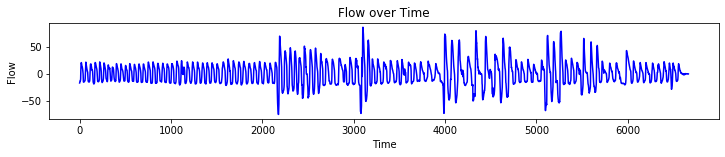

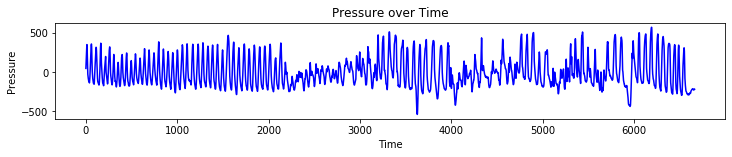

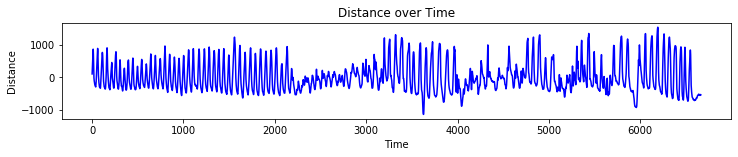

In [10]:
time = range(0, 6664)
flow = df['Flow']
pressure = df['P1']
distance = df['D1']

fig = plt.figure(figsize = (12, 6))
plt.subplot(3,1,1)
plt.plot(time, flow, 'b') # 'r' is the color red
plt.xlabel('Time')
plt.ylabel('Flow')
plt.title('Flow over Time')
plt.show()

fig = plt.figure(figsize = (12, 6))
plt.subplot(3,1,2)
plt.plot(time, pressure, 'b')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.title('Pressure over Time')
plt.show()

fig = plt.figure(figsize = (12, 6))
plt.subplot(3,1,2)
plt.plot(time, distance, 'b')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('Distance over Time')
plt.show()

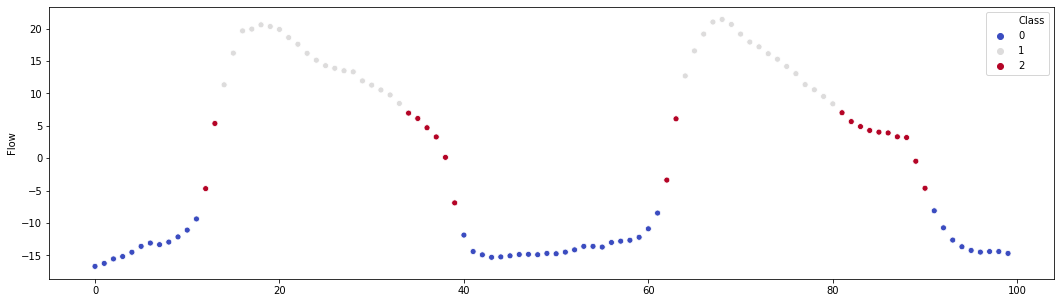

In [10]:
fig = plt.figure(figsize = (18, 5))
sns.scatterplot(y = df['Flow'][0:100], x = range(0, 100), hue = df['Class'][0:100], palette = 'coolwarm')

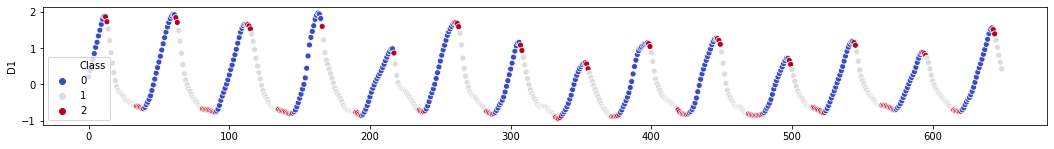

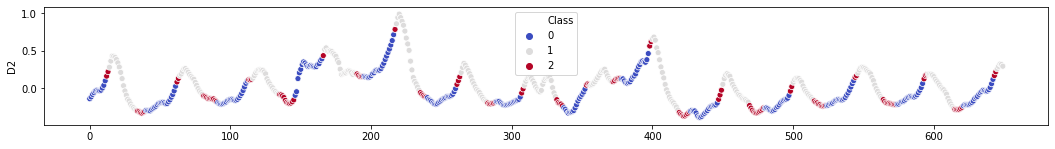

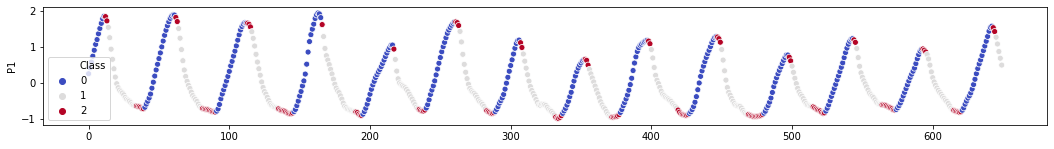

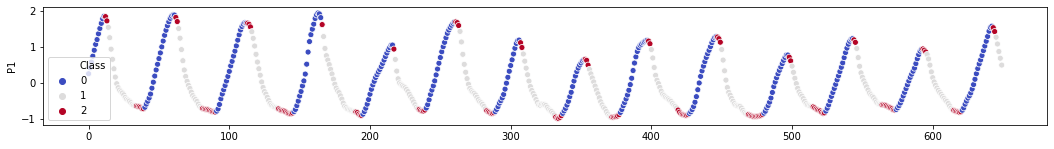

In [11]:
fig = plt.figure(figsize = (18, 10))
plt.subplot(4, 1, 1)
sns.scatterplot(y = X['D1'][0:650], x = range(0, 650), hue = df['Class'][0:650], palette = 'coolwarm')

fig = plt.figure(figsize = (18, 10))
plt.subplot(4, 1, 2)
sns.scatterplot(y = X['D2'][0:650], x = range(0, 650), hue = df['Class'][0:650], palette = 'coolwarm')

fig = plt.figure(figsize = (18, 10))
plt.subplot(4, 1, 3)
sns.scatterplot(y = X['P1'][0:650], x = range(0, 650), hue = df['Class'][0:650], palette = 'coolwarm')

fig = plt.figure(figsize = (18, 10))
plt.subplot(4, 1, 4)
sns.scatterplot(y = X['P1'][0:650], x = range(0, 650), hue = df['Class'][0:650], palette = 'coolwarm')

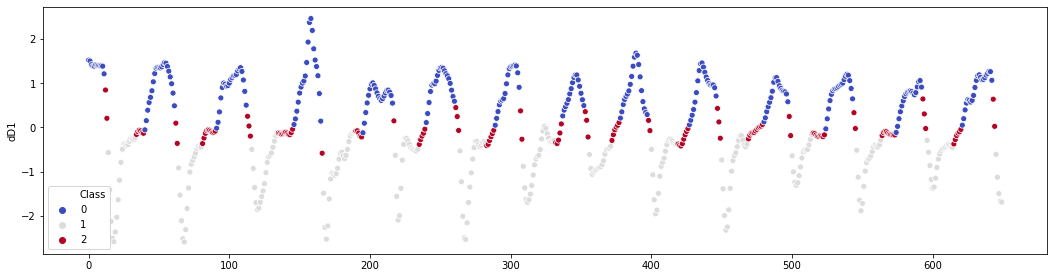

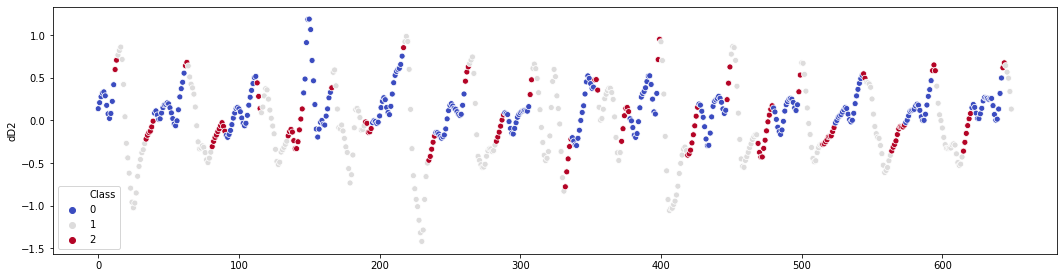

In [12]:
fig = plt.figure(figsize = (18, 10))
plt.subplot(2, 1, 1)
sns.scatterplot(y = X['dD1'][0:650], x = range(0, 650), hue = df['Class'][0:650], palette = 'coolwarm')

fig = plt.figure(figsize = (18, 10))
plt.subplot(2, 1, 2)
sns.scatterplot(y = X['dD2'][0:650], x = range(0, 650), hue = df['Class'][0:650], palette = 'coolwarm')

## Develop Keras Model

### Ideal Parameters

{'Dense_1': 150, 'Dense_2': 50, 'Dropout_1': 0.3, 'Dropout_2': 0.4, 'epochs': 50}
0.9060891938250428

In [13]:
# Develop keras sequential model with optimized parameters through grid search cv
model = keras.Sequential()
model.add(keras.layers.Dense(150, activation = tf.nn.relu, input_dim = 8))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(50, activation = tf.nn.relu))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(3, activation = tf.nn.softmax))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

W1029 09:40:07.036118 4558466368 deprecation.py:506] From /Users/mikefurr/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               1350      
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                7550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 153       
Total params: 9,053
Trainable params: 9,053
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Fit model with given number of epocs (oprtimized @ 50)
EPOCHS = 50
model.fit(X_train, y_train, epochs = EPOCHS)

Epoch 1/50
4664/4664 [==============================] - 0s 56us/sample - loss: 0.5264 - acc: 0.7980
Epoch 2/50
4664/4664 [==============================] - 0s 24us/sample - loss: 0.3536 - acc: 0.8587
Epoch 3/50
4664/4664 [==============================] - 0s 24us/sample - loss: 0.3304 - acc: 0.8720
Epoch 4/50
4664/4664 [==============================] - 0s 25us/sample - loss: 0.3218 - acc: 0.8761
Epoch 5/50
4664/4664 [==============================] - 0s 26us/sample - loss: 0.3204 - acc: 0.8780
Epoch 6/50
4664/4664 [==============================] - 0s 25us/sample - loss: 0.3024 - acc: 0.8831
Epoch 7/50
4664/4664 [==============================] - 0s 24us/sample - loss: 0.3067 - acc: 0.8857
Epoch 8/50
4664/4664 [==============================] - 0s 25us/sample - loss: 0.2893 - acc: 0.8894
Epoch 9/50
4664/4664 [==============================] - 0s 24us/sample - loss: 0.2920 - acc: 0.8894
Epoch 10/50
4664/4664 [==============================] - 0s 25us/sample - loss: 0.2920 - acc: 0.8874

In [15]:
y_train_1 = pd.DataFrame(y_train, index = None, columns = ['Class'])

In [16]:
len(y_train_1)

4664

In [17]:
y_train_1.head()

,Class
0,2
1,2
2,1
3,1
4,2


In [18]:
y_train_1.reset_index(inplace = True, drop = True)

In [21]:
len(y_train_1)

4664

In [22]:
# Scoring the model on testing data from same dataset
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

predictions = model.predict(X_test)

final_pred = []
for score in range(0, len(predictions)):
    final_pred.append(np.argmax(predictions[score]))
    
print(classification_report(y_test, final_pred))

2000/2000 [==============================] - 0s 26us/sample - loss: 0.2393 - acc: 0.9045
Test accuracy: 0.9045
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       850
           1       0.91      0.94      0.92       787
           2       0.78      0.76      0.77       363

    accuracy                           0.90      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.90      0.90      0.90      2000



In [23]:
final_pred_decision = pd.DataFrame(final_pred, columns = ['Class'])

In [24]:
y_test_decision = pd.DataFrame(y_test, columns = ['Class'])

In [25]:
print(classification_report(y_test_decision, final_pred_decision))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       850
           1       0.91      0.94      0.92       787
           2       0.78      0.76      0.77       363

    accuracy                           0.90      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.90      0.90      0.90      2000



## Test Model on New Data

In [26]:
# Read in new dataframe for testing
test = pd.read_csv('test_data_2.csv')
test['Class'] = test['Flow'].apply(label_fix)

In [27]:
test.head()

,Flow,D1,D2,P1,P2,dD1,dD2,dP1,dP2,Class
0,-18.06,108.35,-145.16,84.37,-16.80,362.56,12.29,80.06,1.74,0
1,-18.06,455.13,-139.07,148.93,-15.90,354.47,8.35,73.30,1.30,0
2,-18.23,761.09,-144.06,202.42,-15.86,342.88,3.15,66.64,0.78,0
3,-18.94,1010.37,-161.04,243.71,-17.84,322.09,-3.10,59.18,0.03,0
4,-19.26,1350.27,-172.37,297.91,-19.24,313.99,-8.30,54.45,-0.74,0


In [28]:
# Create the data matrix and scale data
X_1 = test.drop('Class', axis = 1)
X_1.drop('Flow', axis = 1, inplace = True)

scaler = StandardScaler()
scaler.fit(X_1)
scaled_features = scaler.transform(X_1)
X_1 = pd.DataFrame(scaled_features, columns = X_1.columns[:])

# Create the classification matrix
y_1 = test['Class']

In [29]:
loss, acc = model.evaluate(X_1, y_1)
print('Test accuracy:', acc)

test_predictions = model.predict(X_1)

final_pred_test = []
for score in range(0, len(test_predictions)):
    final_pred_test.append(np.argmax(test_predictions[score]))
    
print(classification_report(y_1, final_pred_test))

5019/5019 [==============================] - 0s 13us/sample - loss: 0.6127 - acc: 0.8456
Test accuracy: 0.8455868
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2145
           1       0.85      0.90      0.87      2074
           2       0.75      0.61      0.67       800

    accuracy                           0.85      5019
   macro avg       0.82      0.80      0.81      5019
weighted avg       0.84      0.85      0.84      5019



In [30]:
test_decision = pd.DataFrame(final_pred_test, columns = ['Class'])

In [31]:
y_decision = pd.DataFrame(y_1, columns = ['Class'])

In [32]:
test_decision['Class'] = classSwitch(test_decision['Class'])

In [33]:
y_decision.reset_index(inplace = True, drop = True)
y_decision['Class'] = classSwitch(y_decision['Class'])

In [34]:
print(classification_report(y_decision, test_decision))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      2290
           1       0.91      0.92      0.92      2729

    accuracy                           0.91      5019
   macro avg       0.91      0.91      0.91      5019
weighted avg       0.91      0.91      0.91      5019



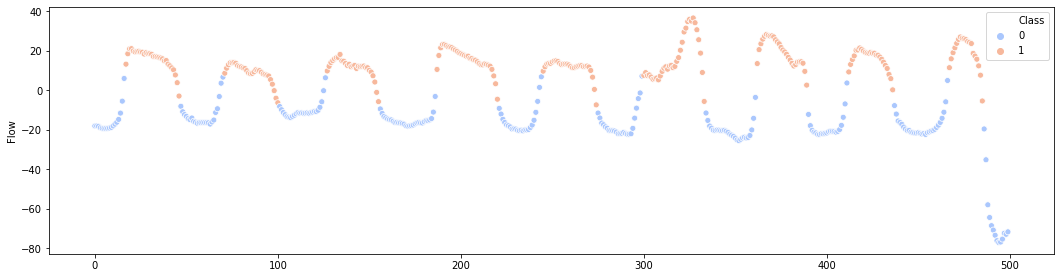

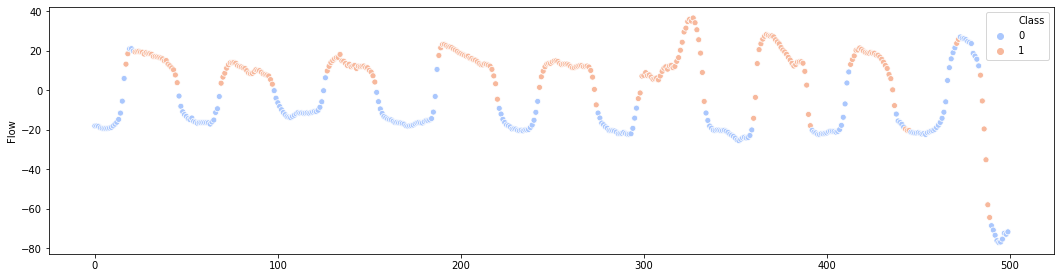

In [35]:
fig = plt.figure(figsize = (18, 10))
plt.subplot(2, 1, 1)
sns.scatterplot(y = test['Flow'][0:500], x = range(0, 500), hue = y_decision['Class'][0:500], palette = 'coolwarm')

fig = plt.figure(figsize = (18, 10))
plt.subplot(2, 1, 2)
sns.scatterplot(y = test['Flow'][0:500], x = range(0, 500), hue = test_decision['Class'][0:500], palette = 'coolwarm')

In [36]:
model.save('my_model.h5')

## EDA on New Data

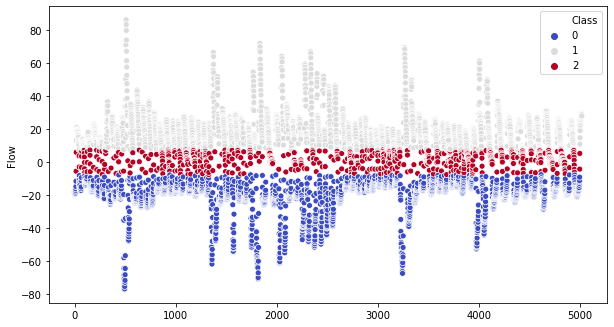

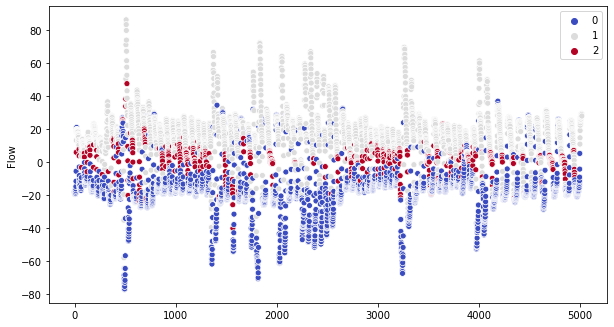

In [37]:
fig = plt.figure(figsize = (10, 12))

time_2 = range(0, 5019)

plt.subplot(2, 1, 1)
sns.scatterplot(x = time_2, y = test['Flow'], hue = test['Class'], palette = 'coolwarm')

fig = plt.figure(figsize = (10, 12))

plt.subplot(2, 1, 2)
sns.scatterplot(x = time_2, y = test['Flow'], hue = final_pred_test, palette = 'coolwarm')

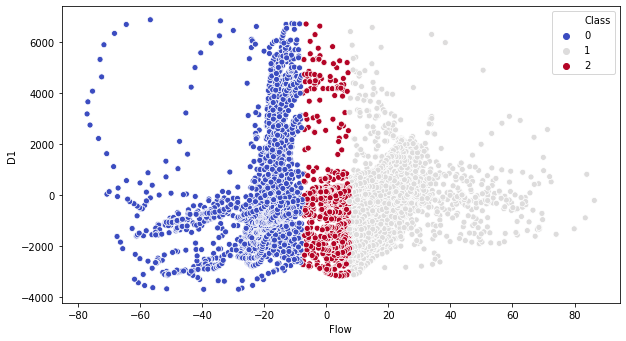

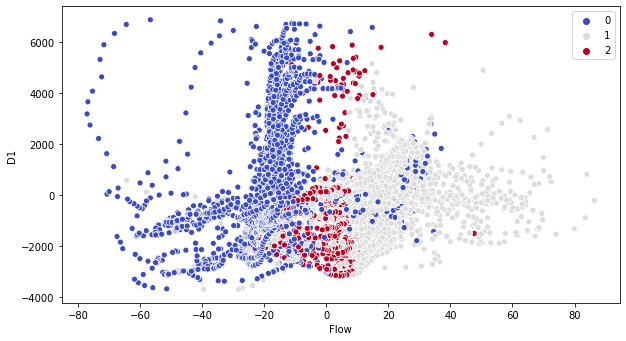

In [38]:
fig = plt.figure(figsize = (10, 12))

plt.subplot(2, 1, 1)
sns.scatterplot(y = test['D1'], x = test['Flow'], hue = test['Class'], palette = 'coolwarm')

fig = plt.figure(figsize = (10, 12))

plt.subplot(2, 1, 2)
sns.scatterplot(y = test['D1'], x = test['Flow'], hue = final_pred_test, palette = 'coolwarm')

## Save Keras File as TensorFlow Lite

In [39]:
# Create keras file to convert
keras_file = "model_Sept_24.h5"

In [40]:
# Save as keras model
keras.models.save_model(model, keras_file)

In [41]:
# Convert to tensorflow lite
converter = tf.lite.TocoConverter.from_keras_model_file('my_model.h5')

W1029 09:40:34.250651 4558466368 deprecation.py:323] From <ipython-input-41-15e875786a65>:2: TocoConverter.from_keras_model_file (from tensorflow.lite.python.lite) is deprecated and will be removed in a future version.
Instructions for updating:
Use `lite.TFLiteConverter.from_keras_model_file` instead.
W1029 09:40:34.254890 4558466368 deprecation.py:506] From /Users/mikefurr/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1029 09:40:34.255683 4558466368 deprecation.py:506] From /Users/mikefurr/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for

In [42]:
tflite_model = converter.convert()

In [43]:
open("my_tflite_model.tflite", "wb").write(tflite_model)

37580

In [44]:
from keras.models import load_model

Using TensorFlow backend.


In [45]:
import h5py

In [46]:
h5py

<module 'h5py' from '/Users/mikefurr/anaconda3/lib/python3.7/site-packages/h5py/__init__.py'>

In [47]:
A = tf.keras.models.load_model('/Users/mikefurr/Documents/GitHub/BreathDetectionSystem/TensorFlow/my_model.h5')

In [48]:
A

## Decision Algorithm

- Takes in the 3 classes predicted through the Machine Learning model

- Outputs what the actual state of the blowers should be

- For example: if the model classifies the state as "inhale" followed by "no action", the decision matrix will log the "no action" but continue to reside in "inhale" state until a full shift to "exhale" occurs following "no action"

- Note that the algorithm assumes that switches can only occur with a "no action" state between inhale and exhale. For example, states cannot go directly from inhale to exhale without the no action

- Adjusting the classification threshold for Flow might make this class switch function even better

In [49]:
# Uncomment to test with sample raw predictions (Classes)
# Classes = [0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 0]

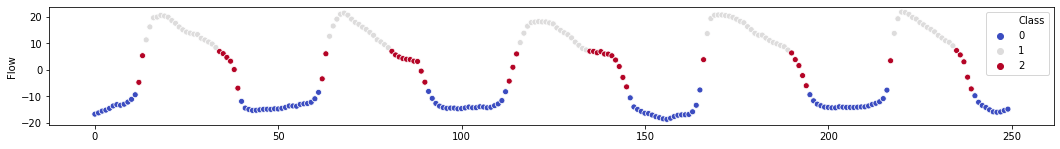

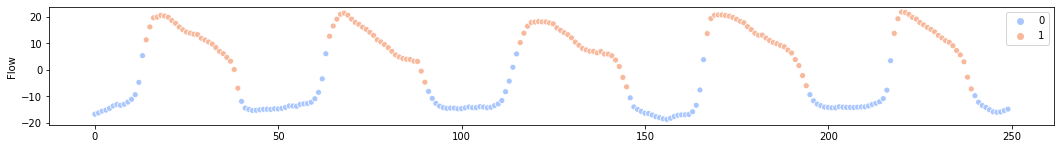

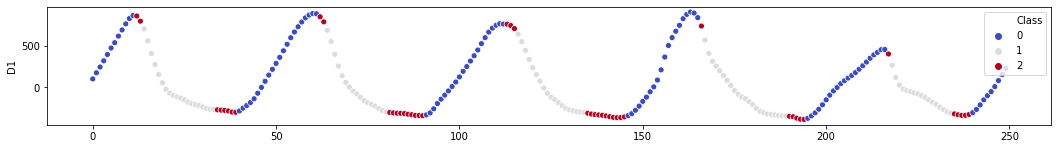

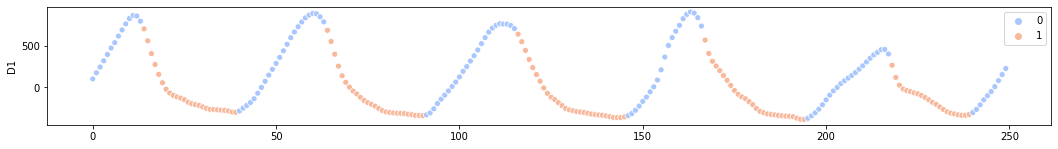

In [50]:
# EDA showing Class Switch vs Regular Classes

class_adjust = classSwitch(df['Class'])

fig = plt.figure(figsize = (18, 10))
plt.subplot(4, 1, 1)
sns.scatterplot(y = df['Flow'][0:250], x = range(0, 250), hue = df['Class'][0:250], palette = 'coolwarm')

fig = plt.figure(figsize = (18, 10))
plt.subplot(4, 1, 2)
sns.scatterplot(y = df['Flow'][0:250], x = range(0, 250), hue = class_adjust[0:250], palette = 'coolwarm')

fig = plt.figure(figsize = (18, 10))
plt.subplot(4, 1, 3)
sns.scatterplot(y = df['D1'][0:250], x = range(0, 250), hue = df['Class'][0:250], palette = 'coolwarm')

fig = plt.figure(figsize = (18, 10))
plt.subplot(4, 1, 4)
sns.scatterplot(y = df['D1'][0:250], x = range(0, 250), hue = class_adjust[0:250], palette = 'coolwarm')

## Change Log

### 9.10
- Added Decision Matrix
- Removes too many values during class shift

### 9.24
- Slight updates and added comments throughout
- Attempted to implement decision algorithm after the testing data was predicted
- Another adjustment would be to only change the class if the probability is extremely high, otherwise remain the same